In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

# Constants
IMAGE_SIZE = (224, 224)
SUPPORTED_FORMATS = ['.jpg', '.jpeg', '.png']

In [2]:
class ImagePreprocessor:
    """Skin Cancer Image preprocessing pipeline"""
    
    @staticmethod
    def hair_remove(image):
        """Remove hair from skin images"""
        try:
            grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17))
            blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
            _, threshold = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
            final_image = cv2.inpaint(image, threshold, 1, cv2.INPAINT_TELEA)
            return final_image
        except Exception as e:
            print(f"Error in hair removal: {str(e)}")
            return image

    @staticmethod
    def sharpen_image(image):
        """Sharpen image using unsharp masking"""
        gaussian = cv2.GaussianBlur(image, (0, 0), 2.0)
        return cv2.addWeighted(image, 1.5, gaussian, -0.5, 0)

In [8]:
def visualize_preprocessing_steps(image_path):
    """
    Visualize each step of preprocessing pipeline for a single image
    
    Args:
        image_path: Path to input image
    """
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Initialize preprocessor
    preprocessor = ImagePreprocessor()
    
    # Preprocess image
    hair_removed_image = preprocessor.hair_remove(image)
    sharpened_image = preprocessor.sharpen_image(hair_removed_image)
    
    # Plot results
    plt.figure(figsize=(20,9))
    
    # Original image
    plt.subplot(2,4,1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    
    # Hair Removed Image
    plt.subplot(2,4,2)
    plt.imshow(hair_removed_image)
    plt.title('Hair Removed Image')
    plt.axis('off')
    
    # Sharpened Image
    plt.subplot(2,4,3)
    plt.imshow(sharpened_image)
    plt.title('Sharpened Image')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

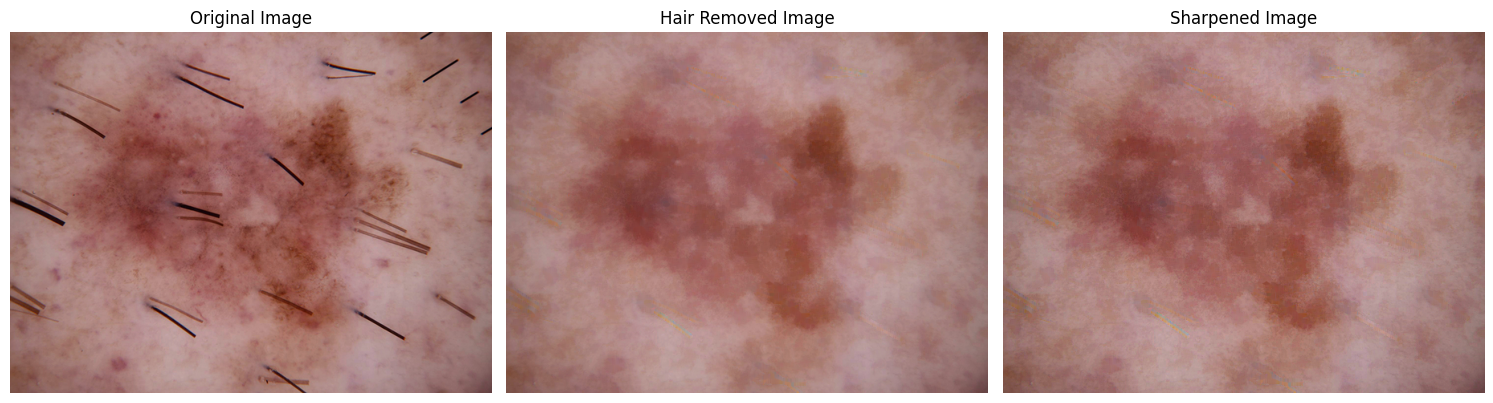

In [9]:
image_path = '/kaggle/input/multiclassskincancer/train_directory/mel/ISIC_0024323.jpg'
visualize_preprocessing_steps(image_path)

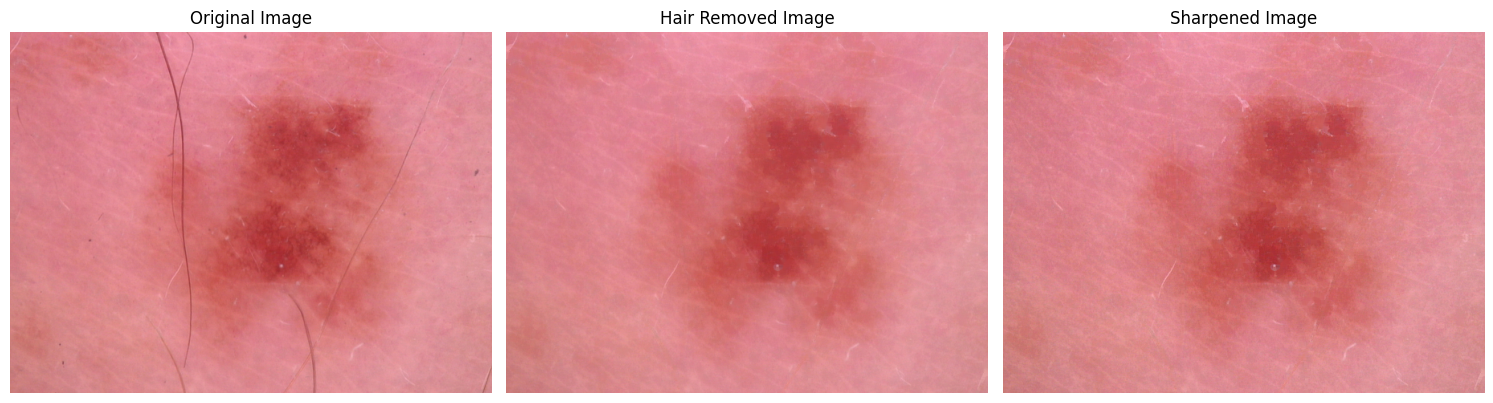

In [10]:
image_path = '/kaggle/input/multiclassskincancer/train_directory/nv/ISIC_0024307.jpg'
visualize_preprocessing_steps(image_path)

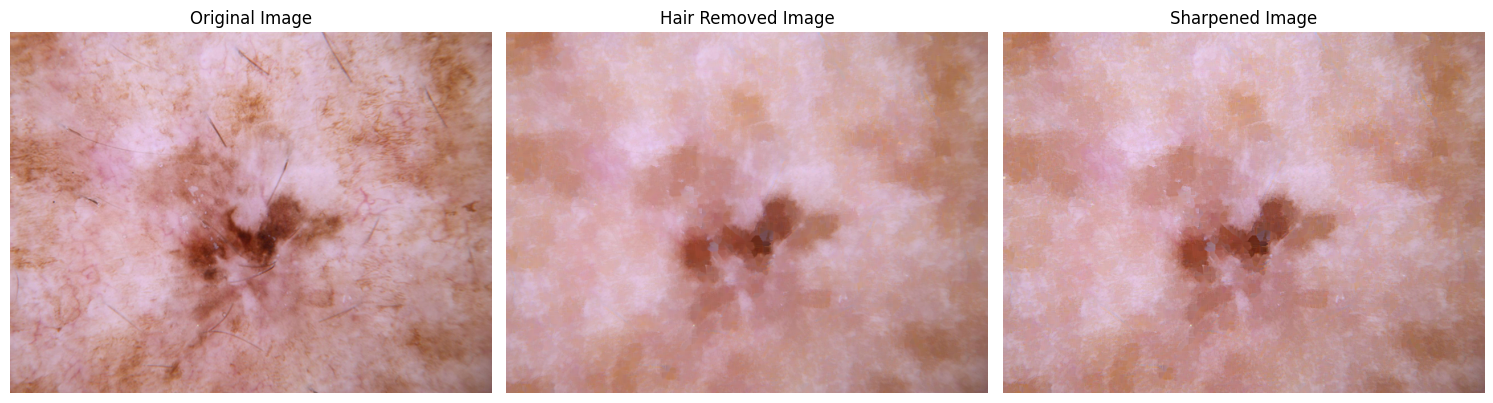

In [11]:
image_path = '/kaggle/input/multiclassskincancer/train_directory/akiec/ISIC_0024575.jpg'
visualize_preprocessing_steps(image_path)